In [1]:
import csv
from collections import defaultdict
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVR
import scipy

# Reading from Features

In [2]:

store_features = defaultdict(list)
cpi_sum = 0.0
cpi_count = 0.0
unemp_sum = 0.0
unemp_count = 0.0
date_map = defaultdict(int)
with open("C:/Users/asha/Desktop/CSE 258/Assignment 2/features.csv","rbU") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    firstrow = True
    for row in reader:
        if firstrow:
            firstrow = False
            continue
        s = ''.join(row)
        l = s.split(',')
        store = l[0]
        l[2] = float(l[2])
        l[3] = float(l[3])
        if l[4]=='NA':
            l[4] = 0.0
        if l[5]=='NA':
            l[5] = 0.0
        if l[6]=='NA':
            l[6] = 0.0
        if l[7]=='NA':
            l[7] = 0.0
        if l[8]=='NA':
            l[8] = 0.0
        try:
            cpi_sum+=float(l[9])
            cpi_count+=1
        except:
            pass
        try:
            unemp_sum += float(l[10])
            unemp_count+=1
        except:
            pass
        if l[11] == 'FALSE':
            l[11] = False
        elif l[11] == 'TRUE':
            l[11] = True
        store_features[store].append(l[1:])

cpi_avg = cpi_sum/cpi_count
unemp_avg = unemp_sum/unemp_count

for s in store_features:
    count = 1
    for f in store_features[s]:
        if f[8] == 'NA':
            f[8] = cpi_avg
        else:
            f[8] = float(f[8])
        if f[9] == 'NA':
            f[9] = unemp_avg
        else:
            f[9] = float(f[9])
        date_map[f[0]] = count
        f[0] = "W" + str(count)
        count+=1

features = defaultdict(dict)
for s in store_features:
    for f in store_features[s]:
        features[s][f[0]] = f[1:]
print features['1']['W1']

[42.31, 2.572, 0.0, 0.0, 0.0, 0.0, 0.0, 211.0963582, 8.106, False]


# Reading from Stores

In [3]:
store_type = defaultdict()
store_size = defaultdict(int)
with open("C:/Users/krish/Desktop/CSE 258/Assignment 2/stores.csv","rbU") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    firstrow = True
    for row in reader:
        if firstrow:
            firstrow = False
            continue
        s = ''.join(row)
        l = s.split(',')
        store = (l[0])
        store_type[store] = l[1]
        store_size[store] = l[2]

# Reading from Train Data

In [32]:


data = []
with open("C:/Users/krish/Desktop/CSE 258/Assignment 2/train.csv","rbU") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    firstrow = True
    for row in reader:
        if firstrow:
            firstrow = False
            continue
        s = ''.join(row)
        l = s.split(',')
        l[3] = float(l[3])
        l[2] = "W" + str(date_map[l[2]])
        l[0] = int(l[0])
        l[1] = int(l[1])
        if l[4] == 'TRUE':
            l[4] = True
            weight = 5
        elif l[4] == 'FALSE':
            l[4] = False
            weight = 1
        l.append(weight)
        data.append(l)

from random import shuffle
shuffle(data)
size = (len(data))
training = data[:size/3]
validation = data[size/3:(2*size)/3]
testing = data[2*(size)/3:]
print len(data)
print len(training)

421570
140523


In [5]:
sum_sales_per_store = defaultdict(float)
count_sales_per_store = defaultdict(float)
for d in training:
    store = int(d[0])
    sum_sales_per_store[store]+=float(d[3])
    count_sales_per_store[store] += 1
avg_sales_per_store = defaultdict(float)
for store in sum_sales_per_store:
    avg_sales_per_store[store] = sum_sales_per_store[store]/count_sales_per_store[store]

In [6]:
sum_sales_per_dept = defaultdict(float)
count_sales_per_dept = defaultdict(float)
for d in training:
    dept = int(d[1])
    sum_sales_per_dept[dept]+=float(d[3])
    count_sales_per_dept[dept] += 1
avg_sales_per_dept = defaultdict(float)
for dept in sum_sales_per_dept:
    avg_sales_per_dept[dept] = sum_sales_per_dept[dept]/count_sales_per_dept[dept]

In [7]:
sum_sales_per_week = defaultdict(float)
count_sales_per_week = defaultdict(float)
for d in training:
    week = d[2]
    sum_sales_per_week[week]+=float(d[3])
    count_sales_per_week[week] += 1
avg_sales_per_week = defaultdict(float)
for week in sum_sales_per_week:
    avg_sales_per_week[week] = sum_sales_per_week[week]/count_sales_per_week[week]

# Plotting

In [66]:
store_dept = defaultdict(dict)
for d in data:
    store = d[0]
    dept = d[1]
    store_dept[store][dept] = d[2:]



store_sales = defaultdict(list)
for s in store_dept:
    for d in store_dept[s]:
        store_sales[s].append(store_dept[s][d][1])

        
dept_sales = defaultdict(list)
for s in store_dept:
    for d in store_dept[s]:
        dept_sales[d].append(store_dept[s][d][1])

Stores v/s Std. Dev. of Store Sales


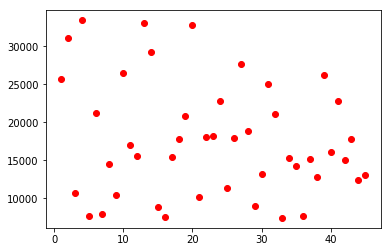

Depts v/s Std. Dev. of Dept Sales


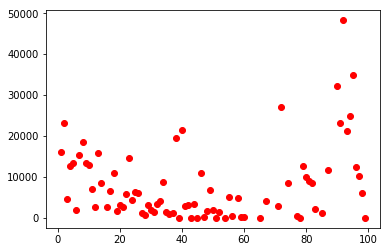

In [67]:
print "Stores v/s Std. Dev. of Store Sales"
store_list = []
for s in store_sales:
    if s not in store_list:
        store_list.append(s)
sales_list = []
for s in store_list:
    sales_list.append(np.std(store_sales[s]))
plt.plot(store_list, sales_list, 'ro')
plt.show()


print "Depts v/s Std. Dev. of Dept Sales"
dept_list = []
for d in dept_sales:
    if d not in dept_list:
        dept_list.append(d)
sales_list = []
for d in dept_list:
    sales_list.append(np.std(dept_sales[d]))
plt.plot(dept_list, sales_list, 'ro')
plt.show()

Stores v/s Sum of Store Sales


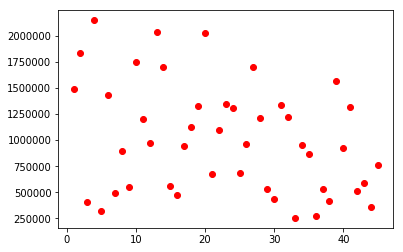

Depts v/s Sum of Dept Sales


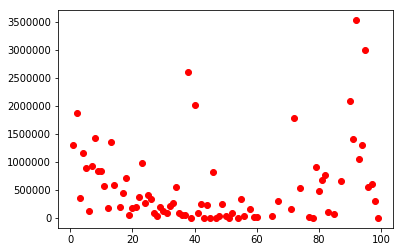

In [68]:
print "Stores v/s Sum of Store Sales"
store_list = []
for s in store_sales:
    if s not in store_list:
        store_list.append(s)
sales_list = []
for s in store_list:
    sales_list.append(np.sum(store_sales[s]))
plt.plot(store_list, sales_list, 'ro')
plt.show()


print "Depts v/s Sum of Dept Sales"
dept_list = []
for d in dept_sales:
    if d not in dept_list:
        dept_list.append(d)
sales_list = []
for d in dept_list:
    sales_list.append(np.sum(dept_sales[d]))
plt.plot(dept_list, sales_list, 'ro')
plt.show()

# Linear Regression with Gradient Descent

In [8]:
def feature(d):
    feat = [1]
    store = str(d[0])
    feat.append(avg_sales_per_store[int(store)])
    dept = str(d[1])
    feat.append(avg_sales_per_dept[int(dept)])
    week = str(d[2])
    feat.append(avg_sales_per_week[week])
    for i in range(0,2):
        feat.append(float(features[store][week][i]))
    for i in range(7,9):
        feat.append(float(features[store][week][i]))
    if (d[4] == True):
        feat.append(5.0)
    elif (d[4] == False):
        feat.append(1.0)
    feat.append(int(store_size[store]))
    return feat


X = [feature(d) for d in training]
y = [float(d[3]) for d in training]
theta,residuals,rank,s = np.linalg.lstsq(X, y)
print theta

"""
Notes:-

1. First we simply tried linear regression with least squares, got a bad WMAE value of ~15000
2. Implemented gradient descent to optimize the regression, found the best value for lambda = 0.1 on the
validation set for the best WMAE value of ~11000
3. First we tried using just store and dept values as integers into the feature vector
4. Tried using each store's sales average, each dept's sales average, each week's sales average into the feature vector,
got a much better WMAE value of 8400, as given below

""";
print X[0]

[ -3.11992034e+04   9.75416355e-01   1.02209852e+00   9.27235689e-01
  -1.12502352e+01   1.07639096e+02  -4.14763015e+00  -1.22355899e+02
   4.18477759e-01   1.85035126e-02]
[1, 13808.248126747452, 30567.844710245725, 14940.742930000008, 49.04, 2.844, 135.6682247, 9.262, 1.0, 103681]


# Testing on validation data

In [9]:
### Gradient descent ###
import scipy
import numpy
# Objective
def f(theta, X, y, lam):
    theta = numpy.matrix(theta).T
    X = numpy.matrix(X)
    y = numpy.matrix(y).T
    diff = X*theta - y
    diffSq = diff.T*diff
    diffSqReg = diffSq / len(X) + lam*(theta.T*theta)
    return diffSqReg.flatten().tolist()[0]

# Derivative
def fprime(theta, X, y, lam):
    theta = numpy.matrix(theta).T
    X = numpy.matrix(X)
    y = numpy.matrix(y).T
    diff = X*theta - y
    res = 2*X.T*diff / len(X) + 2*lam*theta
    return numpy.array(res.flatten().tolist()[0])

X = [feature(d) for d in validation]
y = [float(d[3]) for d in validation]
lam = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for lamb in lam:
    theta, l, info = scipy.optimize.fmin_l_bfgs_b(f, theta, fprime, args = (X, y, lamb))
    predictions = []
    for i in range(len(validation)):
        predictions.append(np.dot(X[i], theta))
    sum = 0.0
    weight_sum = 0.0
    for i in range(len(validation)):
        sum += validation[i][4]*(abs(y[i] - predictions[i]))
        weight_sum += validation[i][4]
    print "WMAE - ", sum/weight_sum, "Lam - ", lamb
print len(predictions)

WMAE -  9282.76584594 Lam -  1e-05
WMAE -  9277.14745565 Lam -  0.0001
WMAE -  9277.15345007 Lam -  0.001
WMAE -  9277.1470032 Lam -  0.01
WMAE -  9277.240136 Lam -  0.1
WMAE -  9277.14345325 Lam -  1
WMAE -  9308.42042669 Lam -  10
WMAE -  9308.40546244 Lam -  100
WMAE -  9274.65352269 Lam -  1000
WMAE -  9334.28410664 Lam -  10000
140523


# Testing on test set

In [10]:
### Gradient descent ###
import scipy
import numpy
# Objective
def f(theta, X, y, lam):
    theta = numpy.matrix(theta).T
    X = numpy.matrix(X)
    y = numpy.matrix(y).T
    diff = X*theta - y
    diffSq = diff.T*diff
    diffSqReg = diffSq / len(X) + lam*(theta.T*theta)
    return diffSqReg.flatten().tolist()[0]

# Derivative
def fprime(theta, X, y, lam):
    theta = numpy.matrix(theta).T
    X = numpy.matrix(X)
    y = numpy.matrix(y).T
    diff = X*theta - y
    res = 2*X.T*diff / len(X) + 2*lam*theta
    return numpy.array(res.flatten().tolist()[0])

X = [feature(d) for d in testing]
y = [float(d[3]) for d in testing]
lam = [10]
for lamb in lam:
    theta, l, info = scipy.optimize.fmin_l_bfgs_b(f, theta, fprime, args = (X, y, lamb))
    predictions = []
    for i in range(len(testing)):
        predictions.append(np.dot(X[i], theta))
    sum = 0.0
    weight_sum = 0.0
    for i in range(len(testing)):
        sum += testing[i][4]*(abs(y[i] - predictions[i]))
        weight_sum += testing[i][4]
    print "WMAE - ", sum/weight_sum, "Lam - ", lamb

    
"""
WMAE -  9325.27779955 Lam -  1e-05
WMAE -  9325.26209252 Lam -  0.0001
WMAE -  9325.27827606 Lam -  0.001
WMAE -  9325.27388634 Lam -  0.01
WMAE -  9325.28189853 Lam -  0.1
WMAE -  9385.63392648 Lam -  1
WMAE -  9385.60441546 Lam -  10
WMAE -  9304.87674921 Lam -  100
WMAE -  9321.49523211 Lam -  1000
WMAE -  9437.64502263 Lam -  10000
""";

WMAE -  9614.77679246 Lam -  10


# SVR

In [38]:
X = [feature(d) for d in training]
y = [float(d[3]) for d in training]
regr = LinearSVR(C=0.0001, random_state = 0)
regr.fit(X,y)
print regr.coef_
X = [feature(d) for d in testing]
y = [float(d[3]) for d in testing]
theta = regr.coef_
predictions = []
for i in range(len(testing)):
    predictions.append(np.dot(X[i], theta))
sum = 0.0
weight_sum = 0.0
for i in range(len(testing)):
    sum += testing[i][4]*(abs(y[i] - predictions[i]))
    weight_sum += testing[i][4]
print "WMAE - ", sum/weight_sum


"""
Got the best values for C = 0.0001, WMAE of ~8100
[ -3.53683268e-01   3.23836143e-01   8.91529556e-01  -1.79479317e-01
  -6.59431761e+00  -1.33874507e+00  -2.01539405e+01  -2.58229013e+00
   7.54292063e-03   2.92419258e-02]
WMAE -  8580.1204139
""";

[ -0.26276978   0.37998998   0.9238341   -0.29738147 -10.85260853
  -0.98086926 -13.83078473  -2.89089279  -0.13567423   0.01569583]
WMAE -  8899.97839481


# Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
X = [feature(d) for d in training]
y = [float(d[3]) for d in training]
regr = RandomForestRegressor(n_estimators=30).fit(X, y)

"""
Tried changing criterion value to 'mae' instead of 'mse', taking too long for training
Tried using 50 trees, memory error
Using 30 trees still gave WMAE of ~11212
""";

In [40]:
print regr.feature_importances_
X = [feature(d) for d in testing]
y = [float(d[3]) for d in testing]
theta = regr.feature_importances_
predictions = []
for i in range(len(testing)):
    predictions.append(np.dot(X[i], theta))
sum = 0.0
weight_sum = 0.0
for i in range(len(testing)):
    sum += X[i][8]*(abs(y[i] - predictions[i]))
    weight_sum += X[i][8]
print "WMAE - ", sum/weight_sum

"""
[ 0.          0.26448921  0.63655105  0.03061003  0.011821    0.00669866
  0.01812739  0.00966677  0.00224206  0.01979383]
WMAE -  8437.19908495
""";

[ 0.          0.23652048  0.63366722  0.03143035  0.01453601  0.00853457
  0.01598205  0.01218773  0.00232486  0.04481672]
WMAE -  11551.196416


# Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
X = [feature(d) for d in training]
y = [float(d[3]) for d in training]
regr = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
print regr.feature_importances_
X = [feature(d) for d in testing]
y = [float(d[3]) for d in testing]
theta = regr.feature_importances_
predictions = []
for i in range(len(testing)):
    predictions.append(np.dot(X[i], theta))
sum = 0.0
weight_sum = 0.0
for i in range(len(testing)):
    sum += X[i][8]*(abs(y[i] - predictions[i]))
    weight_sum += X[i][8]
print "WMAE - ", sum/weight_sum

"""
[ 0.    0.17  0.59  0.1   0.01  0.    0.04  0.05  0.    0.04]
WMAE -  10040.500497
""";

[ 0.    0.19  0.63  0.11  0.    0.    0.01  0.    0.    0.06]
WMAE -  13147.7623221


# A different regression with gradient descent

In [43]:
def new_feature(d):
    feat = [1]
    store = str(d[0])
    #feat.append(avg_sales_per_store[int(store)])
    dept = str(d[1])
    feat.append(avg_sales_per_dept[int(dept)])
    week = str(d[2])
    feat.append(avg_sales_per_week[week])
    for i in range(0,2):
        feat.append(float(features[store][week][i]))
    for i in range(7,9):
        feat.append(float(features[store][week][i]))
    if (d[4] == True):
        feat.append(5.0)
    elif (d[4] == False):
        feat.append(1.0)
    #feat.append(int(store_size[store]))
    return feat


X = defaultdict(list)
y = defaultdict(list)
for d in training:
    store = str(d[0])
    X[store].append(new_feature(d))
    y[store].append(float(d[3]))
theta = defaultdict(float)
residuals = defaultdict(float)
rank = defaultdict(float)
s = defaultdict(float)
for store in X:
    theta[store],residuals[store],rank[store],s[store] = np.linalg.lstsq(X[store], y[store])

"""
Finding theta vectors for each store
""";

In [44]:
l = defaultdict(float)
info = defaultdict(float)
sums = 0.0
weight_sum = 0.0
for store in X:
    theta[store], l[store], info[store] = scipy.optimize.fmin_l_bfgs_b(f, theta[store], fprime, args = (X[store], y[store], 1000.0))
print len(theta[store])
X = defaultdict(list)
y = defaultdict(list)
for d in testing:
    store = str(d[0])
    X[store].append(new_feature(d))
    y[store].append(float(d[3]))
for store in X:
    predictions = []
    for i in range(len(X[store])):
        predictions.append(np.dot(X[store][i], theta[store]))    
    for i in range(len(X[store])):
        sums += X[store][i][7]*(abs(y[store][i] - predictions[i]))
        weight_sum+=X[store][i][7]
    
print "WMAE - ", sums/weight_sum, "Lambda - ", lamb
    
"""
With gradient descent
For training
WMAE -  5938.17339143 Lambda -  0.01
WMAE -  5939.19054025 Lambda -  0.1
WMAE -  5937.70460927 Lambda -  1.0
WMAE -  5930.26456449 Lambda -  10.0
WMAE -  5890.34802177 Lambda -  100.0
WMAE -  5856.30677926 Lambda -  1000.0
WMAE -  5892.4088813 Lambda -  10000.0
WMAE -  5903.12423323 Lambda -  100000.0

For testing
WMAE -  5928.19278459 Lambda -  0.01
WMAE -  5896.10807676 Lambda -  0.1
WMAE -  5895.32661608 Lambda -  1.0
WMAE -  5881.85735044 Lambda -  10.0
WMAE -  5844.84786065 Lambda -  100.0
WMAE -  5811.96001452 Lambda -  1000.0
WMAE -  5848.48406612 Lambda -  10000.0
WMAE -  5859.95295033 Lambda -  100000.0
""";

8
WMAE -  5870.01890535 Lambda -  10


# SVR with the different regression model

In [45]:
X = defaultdict(list)
y = defaultdict(list)
for d in training:
    store = str(d[0])
    X[store].append(new_feature(d))
    y[store].append(float(d[3]))
    
theta = defaultdict(list)
for store in X:
    regr = LinearSVR(C=0.001, random_state = 0).fit(X[store],y[store])
    theta[store] = regr.coef_

X = defaultdict(list)
y = defaultdict(list)
for d in testing:
    store = str(d[0])
    X[store].append(new_feature(d))
    y[store].append(float(d[3]))

sums = 0.0
weight_sum = 0.0
for store in X:
    predictions = []
    for i in range(len(X[store])):
        predictions.append(np.dot(X[store][i], theta[store]))    
    for i in range(len(X[store])):
        sums += X[store][i][7]*(abs(y[store][i] - predictions[i]))
        weight_sum+=X[store][i][7]
    
print "WMAE - ", sums/weight_sum

"""
WMAE -  5666.47689845 C = 0.001 

""";

WMAE -  5696.61749131


# Randomized Forest with new different regression model

In [46]:
from sklearn.ensemble import RandomForestRegressor
X = defaultdict(list)
y = defaultdict(list)
for d in training:
    store = str(d[0])
    X[store].append(new_feature(d))
    y[store].append(float(d[3]))
    
    
theta = defaultdict(list)
n_estimators = 20
for store in X:
    regr = RandomForestRegressor(n_estimators).fit(X[store], y[store])
    theta[store] = regr.feature_importances_

X = defaultdict(list)
y = defaultdict(list)
for d in testing:
    store = str(d[0])
    X[store].append(new_feature(d))
    y[store].append(float(d[3]))

sums = 0.0
weight_sum = 0.0
for store in X:
    predictions = []
    for i in range(len(X[store])):
        predictions.append(np.dot(X[store][i], theta[store]))    
    for i in range(len(X[store])):
        sums += X[store][i][7]*(abs(y[store][i] - predictions[i]))
        weight_sum+=X[store][i][7]
    
print "WMAE - ", sums/weight_sum, "Number of trees - ", n_estimators

"""
WMAE -  8683.87033629 Number of trees -  10
WMAE -  8685.98572569 Number of trees -  15
WMAE -  8642.66585413 Number of trees -  20
WMAE -  8680.07224405 Number of trees -  25
WMAE -  8682.15372603 Number of trees -  30


""";

WMAE -  8772.19060056 Number of trees -  20


# Gradient boosting with the different regression model

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
X = defaultdict(list)
y = defaultdict(list)
for d in training:
    store = str(d[0])
    X[store].append(new_feature(d))
    y[store].append(float(d[3]))
    
    
theta = defaultdict(list)
for store in X:
    regr = GradientBoostingRegressor(n_estimators=2000, learning_rate=1.0, max_depth=1, random_state=0).fit(X[store], y[store])
    theta[store] = regr.feature_importances_

X = defaultdict(list)
y = defaultdict(list)
for d in testing:
    store = str(d[0])
    X[store].append(new_feature(d))
    y[store].append(float(d[3]))

sums = 0.0
weight_sum = 0.0
for store in X:
    predictions = []
    for i in range(len(X[store])):
        predictions.append(np.dot(X[store][i], theta[store]))    
    for i in range(len(X[store])):
        sums += X[store][i][7]*(abs(y[store][i] - predictions[i]))
        weight_sum+=X[store][i][7]
    
print "WMAE - ", sums/weight_sum, "Number of estimators - ", 2000

"""
WMAE -  8982.03326054 Number of estimators -  100
WMAE -  8909.08430421 Number of estimators -  500
WMAE -  8881.81158243 Number of estimators -  1000
WMAE -  8852.61488388 Number of estimators -  2000
WMAE -  8921.84083271 Number of estimators -  3000
WMAE -  9274.11498777 Number of estimators -  10000




""";

WMAE -  8975.8959391 Number of estimators -  2000


# Yet Another Model

In [34]:
sum_sales_dept_store = defaultdict(lambda:defaultdict(float))
count_sales_dept_store = defaultdict(lambda:defaultdict(float))
avg_sales_dept_store = defaultdict(dict)
for d in training:
    store = int(d[0])
    dept = int(d[1])
    week = d[2]
    sum_sales_dept_store[dept][store]+=(float(d[3]))
    count_sales_dept_store[dept][store]+=1
for dept in sum_sales_dept_store:
    for store in sum_sales_dept_store[dept]:
        avg_sales_dept_store[dept][store] = sum_sales_dept_store[dept][store]/count_sales_dept_store[dept][store]


In [35]:
sum_sales_dept_week = defaultdict(lambda:defaultdict(float))
count_sales_dept_week = defaultdict(lambda:defaultdict(float))
avg_sales_dept_week = defaultdict(dict)
for d in training:
    dept = int(d[1])
    week = str(d[2])
    sum_sales_dept_week[dept][week]+=(float(d[3]))
    count_sales_dept_week[dept][week]+=1
for dept in count_sales_dept_week:
    for week in sum_sales_dept_week[dept]:
        avg_sales_dept_week[dept][week] = sum_sales_dept_week[dept][week]/count_sales_dept_week[dept][week]

print testing[0]

[11, 99, 'W100', 250.0, True, 5]


In [36]:
sums = 0.0
weight_sum = 0.0
y = [float(d[3]) for d in testing]
for i in range(len(testing)):
    store = int(testing[i][0])
    dept = int(testing[i][1])
    week = str(testing[i][2])
    try:
        prediction = float(avg_sales_dept_week[dept][week]*avg_sales_dept_store[dept][store])/float(avg_sales_per_dept[dept])
    except:
        prediction = 0
    sums += testing[i][5]*(abs(y[i] - prediction))
    weight_sum += testing[i][5]
print "WMAE - ", sums/weight_sum



"""
Found that there is a huge variance in sales of department. Hence, we found that multuplying the average sales of
every department store pair and the average sales of every department week pair, and dividing that product by the average 
sales of that department, we get the prediction for that given store-dept-week pair in the test set

WMAE -  2404.50388805
""";

WMAE -  2177.04932136


# Without CPI, Fuel Price, etc Model

In [23]:
def newer_feature(d):
    feat = [1]
    store = str(d[0])
    #feat.append(avg_sales_per_store[int(store)])
    dept = str(d[1])
    feat.append(avg_sales_per_dept[int(dept)])
    week = str(d[2])
    feat.append(avg_sales_per_week[week])
    """for i in range(0,2):
        feat.append(float(features[store][week][i]))
    for i in range(7,9):
        feat.append(float(features[store][week][i]))"""
    weekid = int(week[1:])
    if weekid == 2 or weekid == 54 or weekid == 106 or weekid == 158:
        superbowl = 1.0
    else:
        superbowl = 0.0
    if weekid == 32 or weekid == 84 or weekid == 136 or weekid == 188:
        labor = 1.0
    else:
        labor = 0.0
    if weekid == 43 or weekid == 95 or weekid == 147 or weekid == 199:
        thanks = 1.0
    else:
        thanks = 0.0
    if weekid == 48 or weekid == 100 or weekid == 152 or weekid == 204:
        christmas = 1.0
    else:
        christmas = 0.0
    feat.append(superbowl)
    feat.append(labor)
    feat.append(thanks)
    feat.append(christmas)
    if superbowl or labor or thanks or christmas:
        feat.append(5.0)
    else:
        feat.append(1.0)
    #feat.append(int(store_size[store]))
    return feat

X = defaultdict(list)
y = defaultdict(list)
for d in training:
    store = str(d[0])
    X[store].append(newer_feature(d))
    y[store].append(float(d[3]))
theta = defaultdict(float)
residuals = defaultdict(float)
rank = defaultdict(float)
s = defaultdict(float)
for store in X:
    theta[store],residuals[store],rank[store],s[store] = np.linalg.lstsq(X[store], y[store])

    
"""
Same as the second model, except we use a have features for whether Superbowl or not, whether Labor Day or not, whether
Thanksgiving or not, and whether Christmas or not, appended with a weight feature that gives a weight of 5 if it's a
holiday, and 1 if it's not.
""";

In [24]:
l = defaultdict(float)
info = defaultdict(float)
lam = [0.01, 1.0, 100.0, 1000.0, 100000.0]
for lamb in lam:
    sums = 0.0
    weight_sum = 0.0
    for store in X:
        theta[store], l[store], info[store] = scipy.optimize.fmin_l_bfgs_b(f, theta[store], fprime, args = (X[store], y[store], lamb))
    X = defaultdict(list)
    y = defaultdict(list)
    for d in testing:
        store = str(d[0])
        X[store].append(newer_feature(d))
        y[store].append(float(d[3]))
    for store in X:
        predictions = []
        for i in range(len(X[store])):
            predictions.append(np.dot(X[store][i], theta[store]))    
        for i in range(len(X[store])):
            sums += X[store][i][7]*(abs(y[store][i] - predictions[i]))
            weight_sum+=X[store][i][7]
    
    print "WMAE - ", sums/weight_sum, "Lambda - ", lamb

    
    
"""
With gradient descent
For training
WMAE -  5900.2752475 Lambda -  0.01
WMAE -  5900.94078585 Lambda -  0.1
WMAE -  5893.17254454 Lambda -  1.0
WMAE -  5909.52455386 Lambda -  10.0
WMAE -  5951.00880391 Lambda -  100.0
WMAE -  5900.15146793 Lambda -  1000.0
WMAE -  5855.26887412 Lambda -  10000.0
WMAE -  5850.29464915 Lambda -  100000.0

For testing
WMAE -  5610.26966813 Lambda -  0.01
WMAE -  5584.99050598 Lambda -  0.1
WMAE -  5567.3294319 Lambda -  1.0
WMAE -  5539.63092139 Lambda -  10.0
WMAE -  5589.86670649 Lambda -  100.0
WMAE -  5568.56666398 Lambda -  1000.0
WMAE -  5528.46859515 Lambda -  10000.0
WMAE -  5523.6416248 Lambda -  100000.0
""";

WMAE -  5964.4099157 Lambda -  0.01
WMAE -  6017.56706117 Lambda -  1.0
WMAE -  5990.29591481 Lambda -  100.0
WMAE -  5990.298544 Lambda -  1000.0
WMAE -  5990.30651228 Lambda -  100000.0


In [25]:
X = defaultdict(list)
y = defaultdict(list)
for d in training:
    store = str(d[0])
    X[store].append(newer_feature(d))
    y[store].append(float(d[3]))
    
theta = defaultdict(list)
for store in X:
    regr = LinearSVR(C=0.001, random_state = 0).fit(X[store],y[store])
    theta[store] = regr.coef_

X = defaultdict(list)
y = defaultdict(list)
for d in testing:
    store = str(d[0])
    X[store].append(newer_feature(d))
    y[store].append(float(d[3]))

sums = 0.0
weight_sum = 0.0
for store in X:
    predictions = []
    for i in range(len(X[store])):
        predictions.append(np.dot(X[store][i], theta[store]))    
    for i in range(len(X[store])):
        sums += X[store][i][7]*(abs(y[store][i] - predictions[i]))
        weight_sum+=X[store][i][7]
    
print "WMAE - ", sums/weight_sum

"""
WMAE -  5367.310
"""

WMAE -  5818.31055115


In [26]:
from sklearn.ensemble import RandomForestRegressor
X = defaultdict(list)
y = defaultdict(list)
for d in training:
    store = str(d[0])
    X[store].append(newer_feature(d))
    y[store].append(float(d[3]))
    
    
theta = defaultdict(list)
n_estimators = 20
for store in X:
    regr = RandomForestRegressor(n_estimators).fit(X[store], y[store])
    theta[store] = regr.feature_importances_

X = defaultdict(list)
y = defaultdict(list)
for d in testing:
    store = str(d[0])
    X[store].append(newer_feature(d))
    y[store].append(float(d[3]))

sums = 0.0
weight_sum = 0.0
for store in X:
    predictions = []
    for i in range(len(X[store])):
        predictions.append(np.dot(X[store][i], theta[store]))    
    for i in range(len(X[store])):
        sums += X[store][i][7]*(abs(y[store][i] - predictions[i]))
        weight_sum+=X[store][i][7]
    
print "WMAE - ", sums/weight_sum, "Number of trees - ", n_estimators

"""
WMAE -  8450.8680406 Number of trees -  20
"""

WMAE -  8901.88680406 Number of trees -  20


# Yet Another Another Another Model

In [27]:
data = []
with open("C:/Users/krish/Desktop/CSE 258/Assignment 2/train.csv","rbU") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    firstrow = True
    for row in reader:
        if firstrow:
            firstrow = False
            continue
        s = ''.join(row)
        l = s.split(',')
        l[3] = float(l[3])
        l[2] = int(date_map[l[2]])
        l[0] = int(l[0])
        l[1] = int(l[1])
        if l[4] == 'TRUE':
            l[4] = True
            weight = 5
        elif l[4] == 'FALSE':
            l[4] = False
            weight = 1
        l.append(weight)
        data.append(l)

data.sort(key=lambda x: x[2])
size = (len(data))
training = []
testing = []
for d in data:
    if d[2] <=104:
        training.append(d)
    else:
        testing.append(d)
traindata = defaultdict(lambda:defaultdict(dict))
for d in training:
    traindata[d[0]][d[1]][d[2]] = d[3]

In [28]:
sum_sales_per_dept = defaultdict(float)
count_sales_per_dept = defaultdict(float)
for d in training:
    dept = int(d[1])
    sum_sales_per_dept[dept]+=float(d[3])
    count_sales_per_dept[dept] += 1
avg_sales_per_dept = defaultdict(float)
for dept in sum_sales_per_dept:
    avg_sales_per_dept[dept] = sum_sales_per_dept[dept]/count_sales_per_dept[dept]

In [29]:
sum_sales_per_store = defaultdict(float)
count_sales_per_store = defaultdict(float)
for d in training:
    store = int(d[0])
    sum_sales_per_store[store]+=float(d[3])
    count_sales_per_store[store] += 1
avg_sales_per_store = defaultdict(float)
for store in sum_sales_per_store:
    avg_sales_per_store[store] = sum_sales_per_store[store]/count_sales_per_store[store]

In [30]:
sums = 0.0
weight_sum = 0.0
try_count = 0
except_count = 0
for d in testing:
    store = d[0]
    dept = d[1]
    week = d[2]
    try:
        prediction = traindata[store][dept][int(week - 52)] + traindata[store][dept][int(week - 104)] / 2
        try_count+=1
    except:
        prediction = avg_sales_per_dept[dept]
        except_count+=1
    error = abs(float(d[3] - prediction))
    weight = d[5]
    sums += weight*error
    weight_sum += weight
print "WMAE = ", sums/weight_sum
print try_count, except_count

"""
WMAE =  1988.71370856
"""

WMAE =  7814.4089192
110267 5321


'\nWMAE =  1988.71370856\n'

In [49]:
data = []
with open("C:/Users/krish/Desktop/CSE 258/Assignment 2/train.csv","rbU") as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    firstrow = True
    for row in reader:
        if firstrow:
            firstrow = False
            continue
        s = ''.join(row)
        l = s.split(',')
        l[3] = float(l[3])
        l[2] = "W" + str(date_map[l[2]])
        l[0] = int(l[0])
        l[1] = int(l[1])
        if l[4] == 'TRUE':
            l[4] = True
            weight = 5
        elif l[4] == 'FALSE':
            l[4] = False
            weight = 1
        l.append(weight)
        data.append(l)

from random import shuffle
shuffle(data)
size = (len(data))
training = data[:size/2]
#validation = data[size/3:(2*size)/3]
testing = data[(size)/2:]


avg_sales = 0.0
for d in training:
    avg_sales+=float(d[3])
avg_sales/=len(training)
print avg_sales
print training[0]
print testing[0]

15971.5580065
[21, 81, 'W41', 5481.94, False, 1]
[3, 9, 'W133', 9157.57, False, 1]


# Trivial Predictor

In [50]:

sums = 0.0
weights_sum = 0.0
for d in testing:
    weight = float(d[5])
    sums += weight*(abs(float(d[3]) - avg_sales))
    weights_sum+=weight
print sums/weights_sum
    
    

15331.4619165


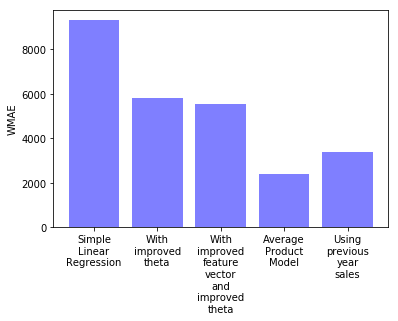

In [56]:
import matplotlib.pyplot as plt
objects = ('Simple\nLinear\nRegression', 'With\nimproved\ntheta', 'With\nimproved\nfeature\nvector\nand\nimproved\ntheta', 'Average\nProduct\nModel', 'Using\nprevious\nyear\nsales')
y_pos = np.arange(len(objects))
results = [9304.87, 5811.96, 5539.63,  2404.50, 3367.86]
plt.bar(y_pos, results, align='center', alpha=0.5, color = 'blue')
plt.xticks(y_pos, objects)
plt.ylabel("WMAE")
plt.show()


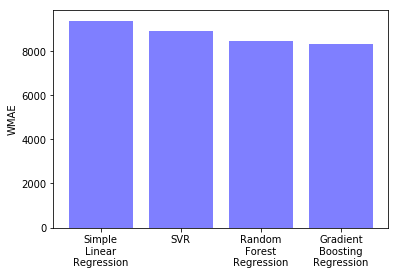

In [47]:
import matplotlib.pyplot as plt
objects = ('Simple\nLinear\nRegression', 'SVR', 'Random\nForest\nRegression', 'Gradient\nBoosting\nRegression')
y_pos = np.arange(len(objects))
results = [9382.87, 8899.12, 8437.19, 8335.61]
plt.bar(y_pos, results, align='center', alpha=0.5, color = 'blue')
plt.xticks(y_pos, objects)
plt.ylabel("WMAE")
plt.show()
